#  CNN Architectures

###  **DSBA 6165: AI & Deep Learning**
### Minwoo "Jake" Lee

## Goal

The goal of this lab activity is practicing to build well-known convolutional neural network architectures and applying to an image classification problem. For this, we use Fashion MNIST dataset that contains 10 classes of images.

In [ ]:
#@title Mount google drive
from google.colab import drive
drive.mount('/content/drive')
from sys import version_info
python_version = f"{version_info.major}.{version_info.minor}"

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.utils import to_categorical, plot_model

%matplotlib inline

TF version: 2.20.0


## Loading Data

### Fashion MNIST
Fashion-MNIST is a dataset of [Zalando's article](https://github.com/zalandoresearch/fashion-mnist) images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example of how the data looks (each class takes three-rows):



<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width=700/>

Each training and test example is assigned to one of the following labels:

|Label |	Description |
|--|--|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Reference**

* Xiao, H., Rasul, K., & Vollgraf, R. (2017). Fashion-mnist: a novel image dataset for benchmarking machine learning algorithms. [arXiv preprint arXiv:1708.07747.](https://arxiv.org/abs/1708.07747)



### TODO1
1. Load the `datasets.fashion_mnist` dataset using the `load_data()` method. Unpack the data into two pairs of arrays (x train,y train) for the training set and (x test,y test) for the test set.

In [12]:
(x_train, y_train),(x_test, y_test) = datasets.fashion_mnist.load_data()


The list `s_labels` contains the following label strings to present results.  

In [11]:
s_labels = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:	"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [13]:
x_train.shape

(60000, 28, 28)

### TODO 1.1
1. Check shapes of x_train , x_test and y_test
  * Hint:To get the dimensions of data, we use the `shape` method in Python

In [14]:
x_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,))

Unlike the CFAR-10 dataset, there is no fourth dimension for 3 channels. Let us change the shapes to align with the CNN layers in this lab.

### TODO 1.2
1. Using `reshape` function convert the dataset to have a single channel
  * Hint:The input shape indices are named as follows: (n_images, x_shape, y_shape, channels)

In [17]:
x_train = x_train.reshape(60000, 28,28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Most image pixel values range from zero to 255. We can simply transform the value range [0, 255] to [0, 1] by dividing the pixel values by 255. This is a common preprocessing step to normalize the pixel values of a image. Input range between 0 and 1 helps the network to converge faster and improve the performance. Furthermore, high-intensity pixels (200~255), brighter pixels, in the image often have strong influence on the model prediction, thus scaling it down makes training more stable.
Let us try this first.  


### TODO 1.3
1. Normalize the pixel values in the x train and x test to [0,1]

In [21]:
x_test = x_test / 255
x_train = x_train / 255

## Visualize the data


### TODO 2
1. Determine the number of distinct values in the target variable(y_train).
    1. Hint: use `unique` function: [Link](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)
1. Using `imshow`, plot the first image in `x_train`.

In [22]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Now let's see the image of a training sample using the following function `imshow` [(Reference_link)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). In matplotlib the "imshow" function is used to display the image

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Text(0.5, 1.0, 'Ankle boot')

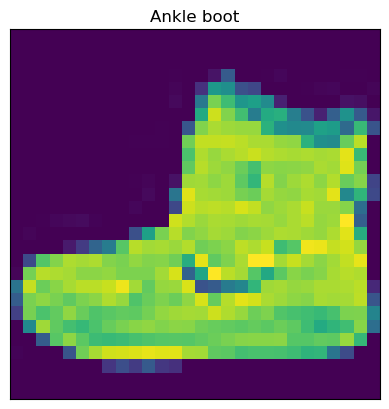

In [26]:
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.title(s_labels[y_train[0]])

### TODO 2.1
We reuse `show_img` function to display the data/label/prediction.

1. Create image plotting function which should take arguments as x , title and bot.
    1. The function should display the tensor (i.e your argument 'x') as an image using `imshow`.
    1. we have to remove the axis of images to remove we use the `xticks` and `yticks` methods, respectively. ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html))
    1. Now that we removed the axis our function should now label using `xlabel` and take argument as bot. ([Reference_link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html))
        

HINT: This is a copied excerpt for `imshow` argument:
> X &nbsp;&nbsp;&nbsp;&nbsp; &nbsp; array-like or PIL image <br/>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        The image data. Supported array shapes are:
>
> (M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.<br/>
> (M, N, 3): an image with RGB values (0-1 float or 0-255 int).<br/>
> (M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.

In [27]:
def show_img(x, title="", bot=""): ## bot is bottom
    plt.imshow(x)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.xlabel(bot)

Now that we have created a image plotting function above lets plot our images from "x_train" tensor, You can also refer to previous lab **TODO 2.2**
### TODO 2.2

Let us observe what images and labels are in the training dataset. Follow the instructions to reproduce the provided output images.
1. using `figure` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)),create a Matplotlib figure with a specified size of (10, 5).
1. write a for loop which take range of 10 values.
2. using `subplot` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)) mention the number of rows your images should be displayed for example below output show 2 rows and 5 columns and another argument as i+1
3. Lets use the `show_img` function we have created and give 3 arguments, 1st argument is every element of x_train and and the second is title of each image is set to the corresponding label from the `s_labels` list and the index of the label in "y_train".
4. Exit the loop adjust the subplots to fit the figure size using `tight_layout` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)) function .


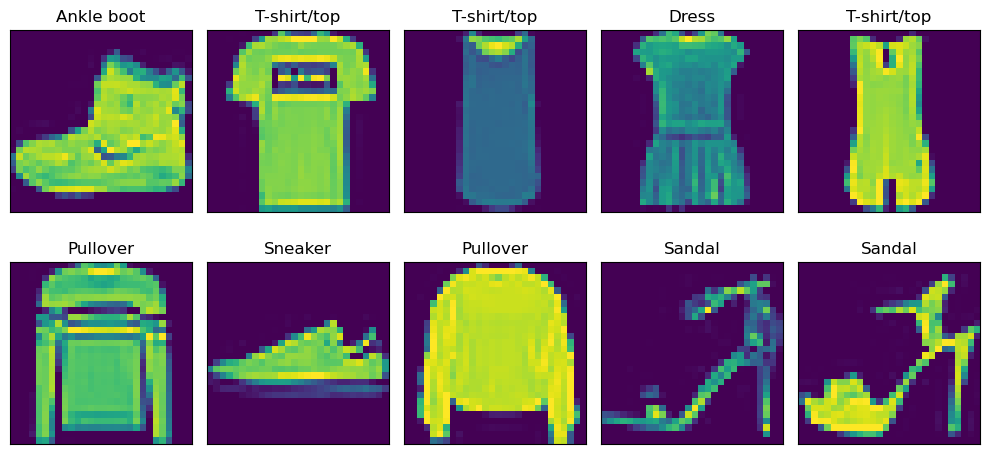

In [29]:
plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    show_img(x_train[i], s_labels[y_train[i]])

plt.tight_layout()

In [31]:
x_train[0,:,:,:].shape

(28, 28, 1)

## LeNet
Keras Conv2d Reference link: https://keras.io/api/layers/convolution_layers/convolution2d/
We can replicate LeNet by using Keras as the image below. 
<img src="https://d2l.ai/_images/lenet.svg" width=900 />

To sum up,
1. Conv: 5x5 kernel. 6 filters. Sigmoid activation. Padding as "same" = equal padding on left and right sides; "valid" = no padding;
2. AvgPool: 2x2 kernel, 2 strides  
3. Conv: 5x5 kernel. 16 filters. Sigmoid activation. Padding as "same" = equal padding on left and right sides; "valid" = no padding;
4. AvgPool: 2x2 kernel, 2 strides  
5. Dense: 120
6. Dense: 84
7. Dense: 10



### TODO 3

1. Looking the figure above, complete the `lenet` architecture

In [53]:
class lenetClass(keras.Model):
    """Combines the normalizer and other layers."""

    def __init__(self):
        super().__init__()
        # self.normalizer = Normalizer(x_train)
        # self.DenseLayers = NetworkLayers(n_hidden, n_output, dropout)

        self.CNN_model = keras.Sequential(
            [
            keras.layers.Conv2D(filters = 6, kernel_size = (5,5), activation = "sigmoid", padding="same", input_shape = (28,28, 1)),
            layers.AveragePooling2D(pool_size=(2,2), strides = 2),

            keras.layers.Conv2D(16, kernel_size = (5,5), activation = "sigmoid", padding = "same"),
            layers.AveragePooling2D(pool_size=(2,2), strides = 2),

            keras.layers.Flatten(),

            layers.Dense(120, activation = "softmax"),
            layers.Dense(84, activation = "softmax"),
            layers.Dense(10, activation = "softmax"),
            ])
        self.CNN_model.summary()

    def call(self, inputs):
        return self.CNN_model(inputs)
    
lenet = lenetClass()
lenet

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 14, 14, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_13            │ (None, 7, 7, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

<lenetClass name=lenet_class_15, built=False>

## AlexNet

<img src="https://miro.medium.com/max/960/0*pJ3o_2zTTNnixhKH.png" width=800 />

The original AlexNet can be implemented with Keras as below. Please review this to understand the implementation.

In [ ]:
class OGAlexNetClass(keras.Model):
    """Combines the normalizer and other layers."""

    def __init__(self):
        super().__init__()
        # self.normalizer = Normalizer(x_train)
        # self.DenseLayers = NetworkLayers(n_hidden, n_output, dropout)

        self.CNN_model = keras.Sequential(
            [
            keras.layers.Conv2D(filters = 96, kernel_size = (11,11), strides = 4, activation = "relu", 
                                padding="same", input_shape = (224, 224, 3)),
            layers.MaxPooling2D(pool_size=(3,3), strides = 2),

            keras.layers.Conv2D(16, kernel_size = (5,5), activation = "relu", padding = "valid"),
            layers.MaxPooling2D(pool_size=(2,2), strides = 2),

            keras.layers.Flatten(),

            layers.Dense(120, activation = "softmax"),
            layers.Dense(84, activation = "softmax"),
            layers.Dense(10, activation = "softmax"),
            ])
        self.CNN_model.summary()

    def call(self, inputs):
        return self.CNN_model(inputs)
    
OGAlexNet = OGAlexNetClass()
OGAlexNet

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 23, 23, 16)     │        38,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 120)            │       232,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,814 (1.21 MB)

 Trainable params: 316,814 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

<OGAlexNetClass name=og_alex_net_class_12, built=False>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 384)      

The original AlexNet above requires a larger image than Fashion MNIST, so let us shrink the AlexNet as below to play with it.
It was designed to process images of size 224x224, while the images in the Fashion MNIST dataset are only 28x28. This means that the original AlexNet cannot be directly used to classify images in the Fashion MNIST dataset.



### TODO 4


<img src="https://webpages.charlotte.edu/mlee173/teach/ml/images/class/AIDL-Lab7-AlexNet.jpg" width=700 />


1. Looking the figure above, complete the `alexnet` architecture

FIX: Stride in the second Conv eqauals to 1.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 28)        728       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 28)        7084      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 28)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 6, 32)          8096      
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 64)         

## VGG

<img src="https://d2l.ai/_images/vgg.svg" width=700 />

The following `vgg_block` implements the VGG block in the above image. When `input_shape` is given, it creates the first `Conv2D` with the input shape info.

In [ ]:
def vgg_block(num_convs, num_channels, input_shape=None):
    blk = keras.Sequential()

    i_shape = {'input_shape': input_shape} if input_shape is not None else {}
    for i in range(num_convs):
        blk.add(
            layers.Conv2D(num_channels, kernel_size=3,
                          padding='same', activation='relu',
                          **i_shape))
        i_shape = {}
    blk.add(layers.MaxPool2D(pool_size=2, strides=2))
    return blk

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 112, 112, 64)      1792      
                                                                 
 sequential_5 (Sequential)   (None, 56, 56, 128)       73856     
                                                                 
 sequential_6 (Sequential)   (None, 28, 28, 256)       885248    
                                                                 
 sequential_7 (Sequential)   (None, 14, 14, 512)       3539968   
                                                                 
 sequential_8 (Sequential)   (None, 7, 7, 512)         4719616   
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 4096)             

Shrinking the VGG network means reducing the number of layers and/or filters in each layer to create a smaller version of the original network. This is necessary because the input images in Fashion MNIST are smaller (28x28 pixels) than the original VGG network's input images (224x224 pixels). A smaller network can be effective for image classification on smaller images while also being faster to train and use. The smaller VGG network requires fewer parameters and computations because it has fewer layers and filters, making it faster to train and use than the original network.

### TODO 5
<img src="https://webpages.charlotte.edu/mlee173/teach/ml/images/class/AIDL-Lab7-VGG.png" width=1000 />

1. Looking the figure above, complete the `vgg` architecture

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 14, 14, 28)        280       
                                                                 
 sequential_11 (Sequential)  (None, 7, 7, 28)          7084      
                                                                 
 sequential_12 (Sequential)  (None, 3, 3, 32)          17344     
                                                                 
 sequential_13 (Sequential)  (None, 1, 1, 64)          55424     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)              

## Inception

<img src="https://d2l.ai/_images/inception-full-90.svg" width=700 />

Inception network contains inception blocks as the above image. Let us define Inception class to build the network.

In [ ]:
class Inception(Model):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4):
        super().__init__()
        self.b1_1 = layers.Conv2D(c1, 1, activation='relu')
        self.b2_1 = layers.Conv2D(c2[0], 1, activation='relu')
        self.b2_2 = layers.Conv2D(c2[1], 3, padding='same',
                                           activation='relu')
        self.b3_1 = layers.Conv2D(c3[0], 1, activation='relu')
        self.b3_2 = layers.Conv2D(c3[1], 5, padding='same',
                                           activation='relu')
        self.b4_1 = layers.MaxPool2D(3, 1, padding='same')
        self.b4_2 = layers.Conv2D(c4, 1, activation='relu')

    def call(self, x):
        b1 = self.b1_1(x)
        b2 = self.b2_2(self.b2_1(x))
        b3 = self.b3_2(self.b3_1(x))
        b4 = self.b4_2(self.b4_1(x))
        return layers.Concatenate()([b1, b2, b3, b4])

This following codes break the network into Conv-MaxPool or Inception-MaxPool groups to assemble them later. Follow the codes and ask questions if anything does not make sense.

In [ ]:
b1 = keras.Sequential([
            layers.Conv2D(64, 7, strides=2, padding='same',
                          activation='relu', input_shape=(224,224,3)),
            layers.MaxPool2D(pool_size=3, strides=2,
                          padding='same')])

b2 = keras.Sequential([
        layers.Conv2D(64, 1, activation='relu'),
        layers.Conv2D(192, 3, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

b3 = keras.Sequential([
        Inception(64, (96, 128), (16, 32), 32),
        Inception(128, (128, 192), (32, 96), 64),
        layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

b4 = keras.Sequential([
        Inception(192, (96, 208), (16, 48), 64),
        Inception(160, (112, 224), (24, 64), 64),
        Inception(128, (128, 256), (24, 64), 64),
        Inception(112, (144, 288), (32, 64), 64),
        Inception(256, (160, 320), (32, 128), 128),
        layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

b5 = keras.Sequential([
        Inception(256, (160, 320), (32, 128), 128),
        Inception(384, (192, 384), (48, 128), 128),
        layers.GlobalAvgPool2D(),
        layers.Flatten()])


inception = keras.Sequential([b1, b2, b3, b4, b5, layers.Dense(10)])
inception.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 56, 56, 64)        9472      
                                                                 
 sequential_15 (Sequential)  (None, 28, 28, 192)       114944    
                                                                 
 sequential_16 (Sequential)  (None, 14, 14, 480)       552432    
                                                                 
 sequential_17 (Sequential)  (None, 7, 7, 832)         2809168   
                                                                 
 sequential_18 (Sequential)  (None, 1024)              2487536   
                                                                 
 dense_15 (Dense)            (None, 10)                10250     
                                                                 
Total params: 5983802 (22.83 MB)
Trainable params: 59

## ResNet

<!-- img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*zbDxCB-0QDAc4oUGVtg3xw.png" width=900 /-->

<img src="https://d2l.ai/_images/resnet18-90.svg" width=900 />


Last, we are implementing the ResNet. Similar to Inception class, we first define the Residual block. This implementation referenced [ResNet Code by Keras Team](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet_common.py).  

In [ ]:
class Residual(keras.Model):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = layers.Conv2D(num_channels, padding='same',
                                            kernel_size=3, strides=strides)
        self.conv2 = layers.Conv2D(num_channels, kernel_size=3,
                                            padding='same')
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = layers.Conv2D(num_channels, kernel_size=1,
                                                strides=strides)
        self.bn1 = layers.BatchNormalization()
        self.bn2 = layers.BatchNormalization()

    def call(self, X):
        Y = keras.activations.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3 is not None:
            X = self.conv3(X)
        Y += X
        return keras.activations.relu(Y)

After the Conv-BN-MaxPool block, we add the 8 residual blocks followed by GlobalAvgPool and Dense layer. Read the codes and ask questions if it is not clear. You should be comfortable of reading and writing this kind of codes for your future DL applications.

In [ ]:
# ResNet-18
resnet = keras.Sequential([
            layers.Conv2D(64, kernel_size=7, strides=2,
                          padding='same', input_shape=(224,224,3)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.MaxPool2D(pool_size=3, strides=2,padding='same')])

resnet.add(Residual(64))
resnet.add(Residual(64))
resnet.add(Residual(128, use_1x1conv=True, strides=2))
resnet.add(Residual(128))
resnet.add(Residual(256, use_1x1conv=True, strides=2))
resnet.add(Residual(256))
resnet.add(Residual(512, use_1x1conv=True, strides=2))
resnet.add(Residual(512))
resnet.add(layers.GlobalAvgPool2D())
resnet.add(layers.Dense(10))

resnet.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 112, 112, 64)      9472      
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 residual (Residual)         (None, 56, 56, 64)        74368     
                                                                 
 residual_1 (Residual)       (None, 56, 56, 64)      

## Training Models

Data is ready and the models are as well. Now we follow the routine to train the models and evaluate the performance.

### TODO 6
1. Using `compile`, prepare your **lenet** model to have "Adam" as an `optimizer`, have a `loss` function to be "SparseCategoricalCrossentropy" also it should take argument as(from_logits=True) and `metrics` as "accuracy".
2. Repeat the above step for **alexnet**
3. Repeat the above step for **vgg**

### TODO 7
1. Using `fit`, train the **lenet** model with training data (`x_train` and `y_train`). Train the model for 10 epochs, and "validation_data" be a tuple of test dataset.
2. Repeat the above step for **alexnet**
3. Repeat the above step for **VGG**

<font color='red' style='bold'>NOTE: this code runs for a long time. Be sure to run in colab or on GPU. </font>



Epoch 1/10


1875/1875 [==============================] - 6s 3ms/step - loss: 0.9522 - accuracy: 0.6437 - val_loss: 0.6378 - val_accuracy: 0.7573
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5648 - accuracy: 0.7847 - val_loss: 0.5495 - val_accuracy: 0.7917
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4769 - accuracy: 0.8224 - val_loss: 0.4823 - val_accuracy: 0.8177
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4280 - accuracy: 0.8427 - val_loss: 0.4464 - val_accuracy: 0.8331
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3980 - accuracy: 0.8528 - val_loss: 0.4194 - val_accuracy: 0.8456
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8619 - val_loss: 0.3837 - val_accuracy: 0.8585
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3545 - accuracy: 0.8675 - val_loss: 0.3844 - val_accuracy: 0.8546
Epo

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6666 - accuracy: 0.7519 - val_loss: 0.4198 - val_accuracy: 0.8444
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4058 - accuracy: 0.8548 - val_loss: 0.3466 - val_accuracy: 0.8707
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3433 - accuracy: 0.8769 - val_loss: 0.3061 - val_accuracy: 0.8870
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3104 - accuracy: 0.8885 - val_loss: 0.3009 - val_accuracy: 0.8877
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2889 - accuracy: 0.8975 - val_loss: 0.2915 - val_accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2740 - accuracy: 0.9017 - val_loss: 0.2982 - val_accuracy: 0.8904
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2597 - accuracy: 0.9066 - val_loss: 0.2898 - val_ac

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6848 - accuracy: 0.7492 - val_loss: 0.4149 - val_accuracy: 0.8477
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3803 - accuracy: 0.8694 - val_loss: 0.3381 - val_accuracy: 0.8733
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3263 - accuracy: 0.8873 - val_loss: 0.3007 - val_accuracy: 0.8960
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2964 - accuracy: 0.8988 - val_loss: 0.2875 - val_accuracy: 0.8975
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2767 - accuracy: 0.9054 - val_loss: 0.2832 - val_accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2560 - accuracy: 0.9108 - val_loss: 0.3025 - val_accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2438 - accuracy: 0.9149 - val_loss: 0.2727 - val_ac


We have Created `plot_learning` function that plots the training and validation loss learning curve using the `history` argument.

### TODO 8
1.Write a for loop to plot the three models using the `plot_learning`function.
  * Hint: use the above-mentioned history list variable that we created.

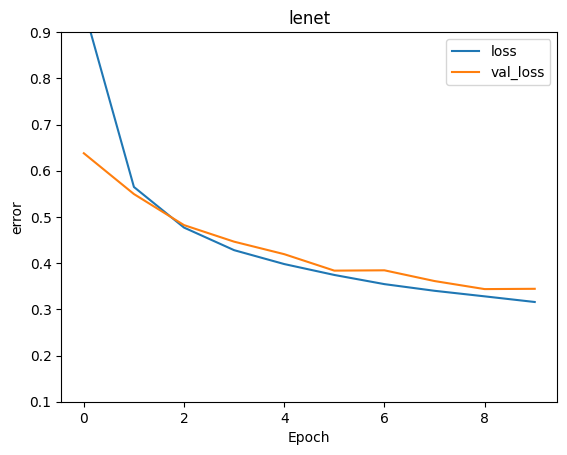

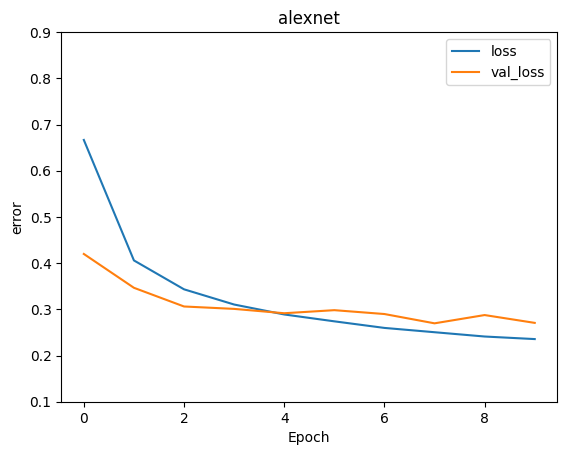

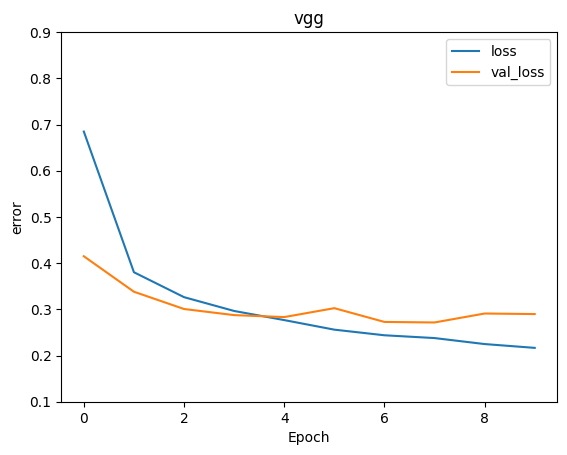

### TODO 8.1
1.Write a for loop Using the `plot_learning` function plot the history but now give additional arguments such as 'accuracy', 'val_accuracy' and  'Accuracy'

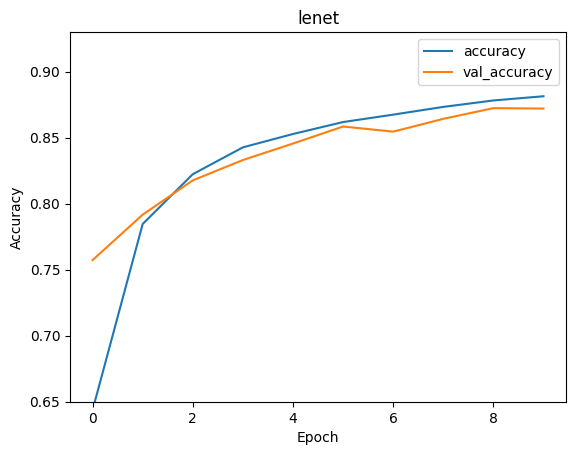

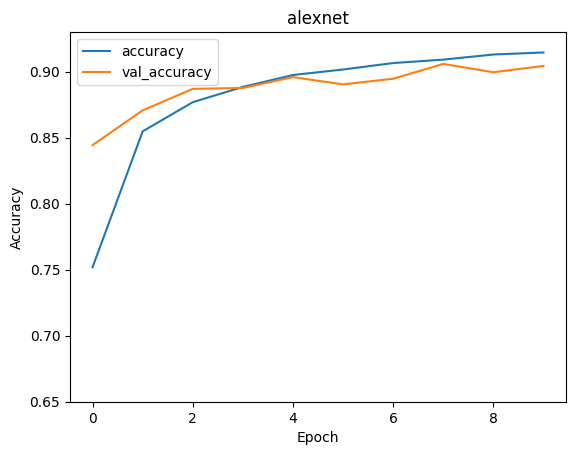

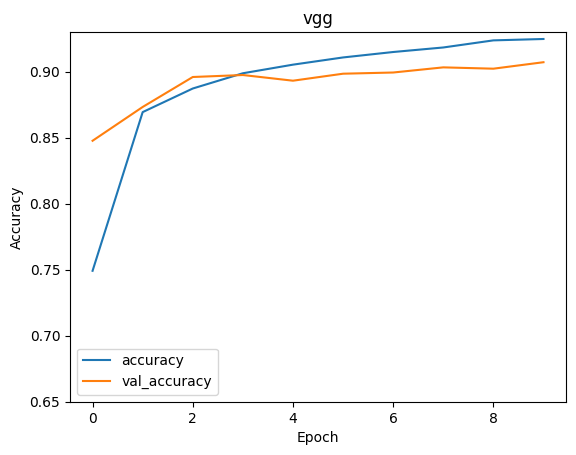

### TODO 9
1. `evaluate` three model on test data (`x_test` and `y_test`).

313/313 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9072


[0.28973588347435, 0.9071999788284302]

In many cases, where the size of the array is too large, it takes too much time to find the maximum elements from them. For this purpose, the numpy module of Python provides a function called `numpy.argmax()`. This function returns indices of the maximum values are returned along with the specified axis.
### TODO 9.1
1. predict the **lenet** model on test data (`x_test`) using `predict` function.
2. Pass the output of this function to the `np.argmax` function.
3. Repeat the same process for **VGG** and **alexnet**

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

### TODO 9.2
And finally lets plot the first 10 images of **lenet** model y_pred using subplot
1. Referring TODO 2.2, show the first 10 images with both labels and predictions.
  * HINT: `show_img` has `bot` and `title` arguments for you to use for predictions and labels.

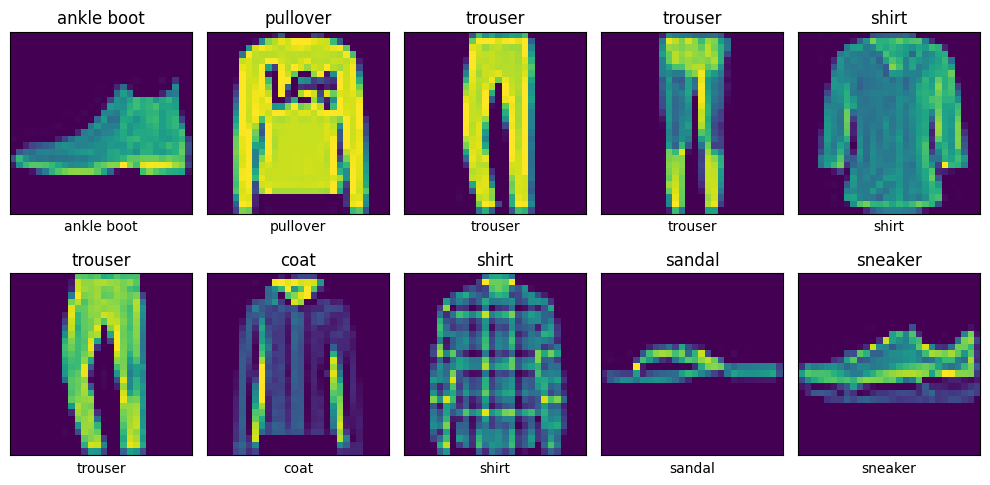